In [3]:
from fit_model import *

In [11]:
def define_model_1(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
	model = Sequential()
	model.add(Embedding(src_vocab, n_units, input_length=src_timesteps, mask_zero=True)) 
	model.add(Bidirectional(GRU(n_units)))
	model.add(RepeatVector(tar_timesteps))
	model.add(Bidirectional(GRU(n_units, return_sequences=True)))
	#model.add(LSTM(n_units, return_sequences=True))
	model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
	return model

In [8]:
ds_filename, train_ds_fn, test_ds_fn = 'dataset/prueba-both-10000.txt', 'dataset/prueba-train-10000.txt','dataset/prueba-test-10000.txt'
units = 64
learning_rate = 0.005
loss_func='sparse_categorical_crossentropy'
epochs=100
batch_size=64
model_save_file_name='Models/tr_model_1_1.h5'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

4510 2272 8 5
(8000, 8) (8000, 5) (2000, 8) (2000, 5)


In [7]:
print(trainX[:10], trainY[:10])

[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [71  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]] [[51  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 6  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 8, 64)             288640    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               49920     
_________________________________________________________________
repeat_vector (RepeatVector) (None, 5, 128)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 5, 128)            74496     
_________________________________________________________________
time_distributed (TimeDistri (None, 5, 2272)           293088    
Total params: 706,144
Trainable params: 706,144
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
125/125 - 21s - loss: 1.0332 - acc: 0.9203 - val_loss: 0.3306 - val_acc: 0.9206

Epoch 00001: val_l

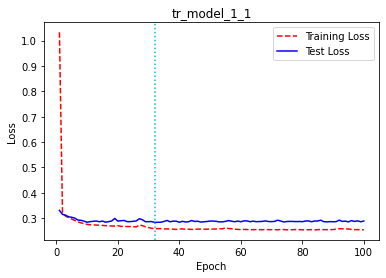

In [6]:
model_history_save_file_name ='model_history/history_model_1_1.npy'
model1_1 = define_model_1(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model1_1,loss_func,learning_rate)
plot_model(model1_1, to_file='model_images/tr_model_1_1_m.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model1_1, model_save_file_name,model_history_save_file_name)
graph_loss_vs_epochs(model1_1.history, 'loss_vs_epochs_images/tr_model_1_1_le.png', 'tr_model_1_1')

In [9]:
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', 'dataset/english-spanish-train-10000.txt','dataset/english-spanish-test-10000.txt'
units = 128
learning_rate = 0.001
loss_func='sparse_categorical_crossentropy'
epochs = 100
batch_size=32
model_save_file_name='Models/prueba_tr_model_1_2.h5'


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 8, 128)            577280    
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               198144    
_________________________________________________________________
repeat_vector (RepeatVector) (None, 5, 256)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 5, 256)            296448    
_________________________________________________________________
time_distributed (TimeDistri (None, 5, 2272)           583904    
Total params: 1,655,776
Trainable params: 1,655,776
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
250/250 - 29s - loss: 3.7814 - acc: 0.4883 - val_loss: 3.3348 - val_acc: 0.5030

Epoch 00001: v

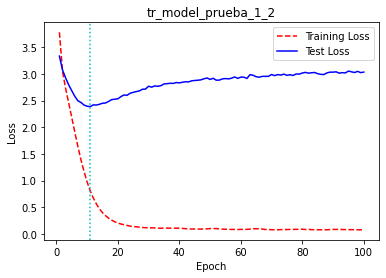

In [12]:
from fit_model import *
ds_filename, train_ds_fn, test_ds_fn = 'dataset/spanish-english-both-all.txt', 'dataset/spanish-english-train-all.txt','dataset/spanish-english-test-all.txt'
units = 128
learning_rate = 0.001
loss_func='sparse_categorical_crossentropy'
epochs = 100
batch_size=32
model_save_file_name='Models/model_spa_eng_all.h5'

def define_model_1(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
	model = Sequential()
	model.add(Embedding(src_vocab, n_units, input_length=src_timesteps, mask_zero=True)) 
	model.add(Bidirectional(GRU(n_units)))
	model.add(RepeatVector(tar_timesteps))
	model.add(Bidirectional(GRU(n_units, return_sequences=True)))
	model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
	return model

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)
print('datasets',train[:10], test[:10])

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model_history_save_file_name ='model_history/history_model_spa_eng_all.npy'
model_spa_eng_all = define_model_1(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model_spa_eng_all,loss_func,learning_rate)
plot_model(model_spa_eng_all, to_file='model_images/model_spa_eng_all_m.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model_spa_eng_all, model_save_file_name,model_history_save_file_name)
graph_loss_vs_epochs(model_spa_eng_all.history, 'loss_vs_epochs_images/model_spa_eng_all_le.png', 'model_spa_eng_all')

In [22]:
def define_model_1_3(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
	model = Sequential()
	model.add(Embedding(src_vocab, n_units, input_length=src_timesteps, mask_zero=True)) 
	model.add(Bidirectional(SimpleRNN(n_units)))
	model.add(RepeatVector(tar_timesteps))
	model.add(Bidirectional(LSTM(n_units, return_sequences=True)))
	#model.add(LSTM(n_units, return_sequences=True))
	model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
	return model

In [27]:
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', 'dataset/english-spanish-train-10000.txt','dataset/english-spanish-test-10000.txt'
units = 256
learning_rate = 0.008
loss_func='sparse_categorical_crossentropy'
epochs = 100
batch_size = 64
model_save_file_name='Models/tr_model_1_3.h5'

testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(8000, 8) (8000, 5) (2000, 8) (2000, 5)


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 8, 256)            1154560   
_________________________________________________________________
bidirectional_14 (Bidirectio (None, 512)               262656    
_________________________________________________________________
repeat_vector_7 (RepeatVecto (None, 5, 512)            0         
_________________________________________________________________
bidirectional_15 (Bidirectio (None, 5, 512)            1574912   
_________________________________________________________________
time_distributed_7 (TimeDist (None, 5, 2272)           1165536   
Total params: 4,157,664
Trainable params: 4,157,664
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
125/125 - 53s - loss: 0.6539 - acc: 0.9281 - val_loss: 0.3856 - val_acc: 0.9317

Epoch 00001:

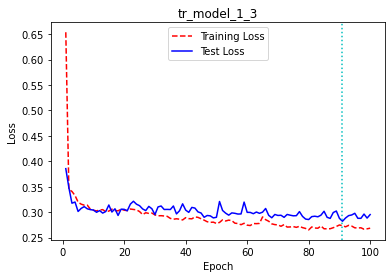

In [28]:
model_history_save_file_name ='model_history/history_model_1_3.npy'
model1_3 = define_model_1_3(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model1_3,loss_func,learning_rate)
plot_model(model1_3, to_file='model_images/tr_model_1_3_m.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model1_3, model_save_file_name,model_history_save_file_name)
graph_loss_vs_epochs(model1_3.history, 'loss_vs_epochs_images/tr_model_1_3_le.png', 'tr_model_1_3')

In [29]:
def define_model_2(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
	model = Sequential()
	model.add(Embedding(src_vocab, n_units, input_length=src_timesteps, mask_zero=True)) 
	model.add(Bidirectional(GRU(n_units)))
	model.add(RepeatVector(tar_timesteps))
	model.add(Bidirectional(GRU(n_units, return_sequences=True)))
	model.add(TimeDistributed(Dense(n_units, activation='relu')))
	model.add(Dropout(0.5))
	model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
	return model

In [30]:
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', 'dataset/english-spanish-train-10000.txt','dataset/english-spanish-test-10000.txt'
units = 128
learning_rate = 0.001
loss_func='sparse_categorical_crossentropy'
epochs = 100
batch_size=32
model_save_file_name='Models/tr_model_2_1.h5'

print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(8000, 8) (8000, 5) (2000, 8) (2000, 5)


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 8, 128)            577280    
_________________________________________________________________
bidirectional_16 (Bidirectio (None, 256)               198144    
_________________________________________________________________
repeat_vector_8 (RepeatVecto (None, 5, 256)            0         
_________________________________________________________________
bidirectional_17 (Bidirectio (None, 5, 256)            296448    
_________________________________________________________________
time_distributed_8 (TimeDist (None, 5, 128)            32896     
_________________________________________________________________
dropout (Dropout)            (None, 5, 128)            0         
_________________________________________________________________
time_distributed_9 (TimeDist (None, 5, 2272)          

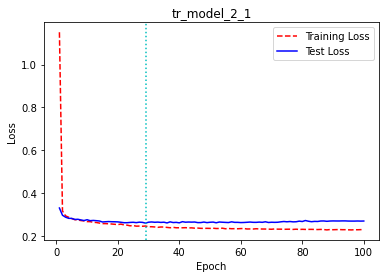

In [31]:
model_history_save_file_name ='model_history/history_model_2_1.npy'
model2_1 = define_model_2(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model2_1,loss_func,learning_rate)
plot_model(model2_1, to_file='model_images/tr_model_2_1_m.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model2_1, model_save_file_name,model_history_save_file_name)
graph_loss_vs_epochs(model2_1.history, 'loss_vs_epochs_images/tr_model_2_1_le.png', 'tr_model_2_1')

In [4]:
def define_model_2_2(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
    model = Sequential()
    model.add(Embedding(src_vocab, n_units, input_length=src_timesteps, mask_zero=True)) 
    model.add(Bidirectional(GRU(n_units)))
    model.add(Dropout(0.5))
    model.add(RepeatVector(tar_timesteps))
    model.add(Bidirectional(GRU(n_units, return_sequences=True)))
    model.add(Dropout(0.5))
    model.add(TimeDistributed(Dense(n_units, activation='relu')))
    model.add(Dropout(0.5))
    model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
    return model

In [5]:
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', 'dataset/english-spanish-train-10000.txt','dataset/english-spanish-test-10000.txt'
units = 256
learning_rate = 0.001
loss_func='sparse_categorical_crossentropy'
epochs = 100
batch_size = 128
model_save_file_name='Models/tr_model_2_2.h5'

print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(8000, 8) (8000, 5) (2000, 8) (2000, 5)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 8, 256)            1154560   
_________________________________________________________________
bidirectional (Bidirectional (None, 512)               789504    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
repeat_vector (RepeatVector) (None, 5, 512)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 5, 512)            1182720   
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 512)            0         
_________________________________________________________________
time_distributed (TimeDistri (None, 5, 256)            1

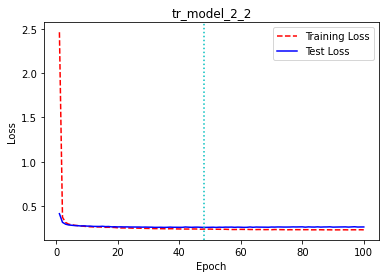

In [6]:
model_history_save_file_name ='model_history/history_model_2_2.npy'
model2_2 = define_model_2_2(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model2_2,loss_func,learning_rate)
plot_model(model2_2, to_file='model_images/tr_model_2_2_m.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model2_2, model_save_file_name,model_history_save_file_name)
graph_loss_vs_epochs(model2_2.history, 'loss_vs_epochs_images/tr_model_2_2_le.png', 'tr_model_2_2')

In [7]:
def define_model_2_3(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
    model = Sequential()
    model.add(Embedding(src_vocab, n_units, input_length=src_timesteps, mask_zero=True)) 
    model.add(Bidirectional(SimpleRNN(n_units, activation='relu')))
    model.add(Dropout(0.5))
    model.add(RepeatVector(tar_timesteps))
    model.add(Bidirectional(SimpleRNN(128,activation='relu', return_sequences=True)))
    model.add(Dropout(0.5))
    model.add(TimeDistributed(Dense(64, activation='relu')))
    model.add(Dropout(0.5))
    model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
    return model

In [8]:
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', 'dataset/english-spanish-train-10000.txt','dataset/english-spanish-test-10000.txt'
units = 256
learning_rate = 0.001
loss_func='sparse_categorical_crossentropy'
epochs = 100
batch_size = 128
model_save_file_name='Models/tr_model_2_3.h5'

print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(8000, 8) (8000, 5) (2000, 8) (2000, 5)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 8, 256)            1154560   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 5, 512)            0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 5, 256)            164096    
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 256)            0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 5, 64)            

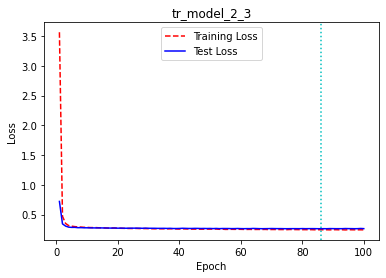

In [9]:
model_history_save_file_name ='model_history/history_model_2_3.npy'
model2_3 = define_model_2_3(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model2_3,loss_func,learning_rate)
plot_model(model2_3, to_file='model_images/tr_model_2_3_m.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model2_3, model_save_file_name,model_history_save_file_name)
graph_loss_vs_epochs(model2_3.history, 'loss_vs_epochs_images/tr_model_2_3_le.png', 'tr_model_2_3')

In [10]:
def define_model_3(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
    model = Sequential()
    model.add(Embedding(input_dim=src_vocab,output_dim=128))
    model.add(Bidirectional(GRU(64,return_sequences=False)))
    model.add(RepeatVector(tar_timesteps))
    model.add(TimeDistributed(Dense(tar_vocab,activation='softmax')))
    return model

In [11]:
def define_model_3_2(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
    model = Sequential()
    model.add(Embedding(input_dim=src_vocab,output_dim=128))
    model.add(Bidirectional(GRU(128,return_sequences=False)))
    model.add(RepeatVector(tar_timesteps))
    model.add(TimeDistributed(Dense(1024,activation='relu')))
    #model.add(RepeatVector(tar_timesteps))
    model.add(Dropout(0.5))
    model.add(TimeDistributed(Dense(tar_vocab,activation='softmax')))
    return model

In [12]:
def define_model_3_3(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
    model = Sequential()
    model.add(Embedding(input_dim=src_vocab,output_dim=128))
    model.add(Bidirectional(LSTM(64,return_sequences=False)))
    model.add(RepeatVector(tar_timesteps))
    model.add(TimeDistributed(Dense(tar_vocab,activation='softmax')))
    return model

In [13]:
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', 'dataset/english-spanish-train-10000.txt','dataset/english-spanish-test-10000.txt'
units = 256
learning_rate = 0.003
loss_func='sparse_categorical_crossentropy'
epochs = 100
batch_size = 128
model_save_file_name='Models/tr_model_3_1.h5'

print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(8000, 8) (8000, 5) (2000, 8) (2000, 5)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 128)         577280    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 128)               74496     
_________________________________________________________________
repeat_vector_2 (RepeatVecto (None, 5, 128)            0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, 5, 2272)           293088    
Total params: 944,864
Trainable params: 944,864
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
63/63 - 8s - loss: 1.5679 - acc: 0.9076 - val_loss: 0.4712 - val_acc: 0.9197

Epoch 00001: val_loss improved from inf to 0.47117, saving model to Models\tr_model_3_1.h5
Epoch 2/100
63/63 - 5s - loss: 0.4642 - acc: 0.9222 - val_lo

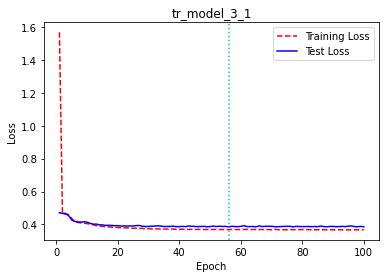

In [14]:
model_history_save_file_name ='model_history/history_model_3_1.npy'
model3_1 = define_model_3(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model3_1,loss_func,learning_rate)
plot_model(model3_1, to_file='model_images/tr_model_3_1_m.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model3_1, model_save_file_name,model_history_save_file_name)
graph_loss_vs_epochs(model3_1.history, 'loss_vs_epochs_images/tr_model_3_1_le.png', 'tr_model_3_1')

In [15]:
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', 'dataset/english-spanish-train-10000.txt','dataset/english-spanish-test-10000.txt'
units = 256
learning_rate = 0.003
loss_func='sparse_categorical_crossentropy'
epochs = 100
batch_size = 128
model_save_file_name='Models/tr_model_3_2.h5'

print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(8000, 8) (8000, 5) (2000, 8) (2000, 5)


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 128)         577280    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 256)               198144    
_________________________________________________________________
repeat_vector_3 (RepeatVecto (None, 5, 256)            0         
_________________________________________________________________
time_distributed_5 (TimeDist (None, 5, 1024)           263168    
_________________________________________________________________
dropout_6 (Dropout)          (None, 5, 1024)           0         
_________________________________________________________________
time_distributed_6 (TimeDist (None, 5, 2272)           2328800   
Total params: 3,367,392
Trainable params: 3,367,392
Non-trainable params: 0
____________________________________________

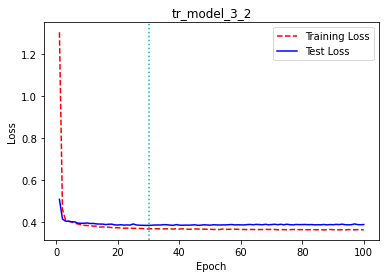

In [16]:
model_history_save_file_name ='model_history/history_model_3_2.npy'
model3_2 = define_model_3_2(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model3_2,loss_func,learning_rate)
plot_model(model3_2, to_file='model_images/tr_model_3_2_m.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model3_2, model_save_file_name,model_history_save_file_name)
graph_loss_vs_epochs(model3_2.history, 'loss_vs_epochs_images/tr_model_3_2_le.png', 'tr_model_3_2')

In [17]:
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', 'dataset/english-spanish-train-10000.txt','dataset/english-spanish-test-10000.txt'
units = 256
learning_rate = 0.003
loss_func='sparse_categorical_crossentropy'
epochs = 100
batch_size = 128
model_save_file_name='Models/tr_model_3_3.h5'

print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(8000, 8) (8000, 5) (2000, 8) (2000, 5)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 128)         577280    
_________________________________________________________________
bidirectional_6 (Bidirection (None, 128)               98816     
_________________________________________________________________
repeat_vector_4 (RepeatVecto (None, 5, 128)            0         
_________________________________________________________________
time_distributed_7 (TimeDist (None, 5, 2272)           293088    
Total params: 969,184
Trainable params: 969,184
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
63/63 - 8s - loss: 1.5834 - acc: 0.9074 - val_loss: 0.4708 - val_acc: 0.9197

Epoch 00001: val_loss improved from inf to 0.47077, saving model to Models\tr_model_3_3.h5
Epoch 2/100
63/63 - 5s - loss: 0.4644 - acc: 0.9222 - val_lo

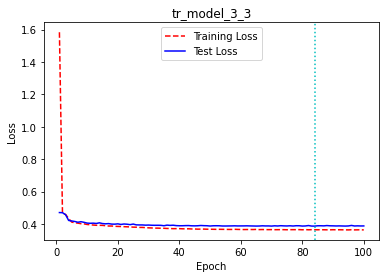

In [18]:
model_history_save_file_name ='model_history/history_model_3_3.npy'
model3_3 = define_model_3_3(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model3_3,loss_func,learning_rate)
plot_model(model3_3, to_file='model_images/tr_model_3_3_m.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model3_3, model_save_file_name,model_history_save_file_name)
graph_loss_vs_epochs(model3_3.history, 'loss_vs_epochs_images/tr_model_3_3_le.png', 'tr_model_3_3')

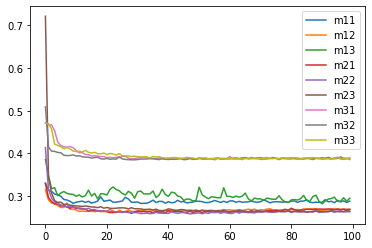

900
0.25853994488716125
(array([447], dtype=int64),)
0.25853994488716125


In [35]:
loss_m11=load_history('model_history/history_model_1_1.npy')['val_loss']
loss_m12=load_history('model_history/history_model_1_2.npy')['val_loss']
loss_m13=load_history('model_history/history_model_1_3.npy')['val_loss']
loss_m21=load_history('model_history/history_model_2_1.npy')['val_loss']
loss_m22=load_history('model_history/history_model_2_2.npy')['val_loss']
loss_m23=load_history('model_history/history_model_2_3.npy')['val_loss']
loss_m31=load_history('model_history/history_model_3_1.npy')['val_loss']
loss_m32=load_history('model_history/history_model_3_2.npy')['val_loss']
loss_m33=load_history('model_history/history_model_3_3.npy')['val_loss']
x=range(100)
plt.plot(x,loss_m11)
plt.plot(x,loss_m12)
plt.plot(x,loss_m13)
plt.plot(x,loss_m21)
plt.plot(x,loss_m22)
plt.plot(x,loss_m23)
plt.plot(x,loss_m31)
plt.plot(x,loss_m32)
plt.plot(x,loss_m33)
plt.legend(['m11','m12','m13','m21','m22','m23','m31','m32','m33'], loc='upper right')
plt.show()
#plt.savefig('loss_comparation/losses_t')
b = []
b.append(loss_m11)
b.append(loss_m12)
b.append(loss_m13)
b.append(loss_m21)

b.append(loss_m22)
b.append(loss_m23)
b.append(loss_m31)
b.append(loss_m32)
b.append(loss_m33)
a=np.array(b).flatten()
print(len(a))
print(min(a))
result = np.where(a == min(a))
print(result)
print(min(loss_m22))

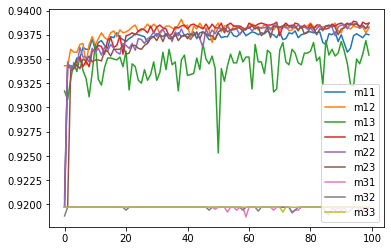

<Figure size 432x288 with 0 Axes>

In [20]:
loss_m11=load_history('model_history/history_model_1_1.npy')['val_acc']
loss_m12=load_history('model_history/history_model_1_2.npy')['val_acc']
loss_m13=load_history('model_history/history_model_1_3.npy')['val_acc']
loss_m21=load_history('model_history/history_model_2_1.npy')['val_acc']
loss_m22=load_history('model_history/history_model_2_2.npy')['val_acc']
loss_m23=load_history('model_history/history_model_2_3.npy')['val_acc']
loss_m31=load_history('model_history/history_model_3_1.npy')['val_acc']
loss_m32=load_history('model_history/history_model_3_2.npy')['val_acc']
loss_m33=load_history('model_history/history_model_3_3.npy')['val_acc']
x=range(100)
plt.plot(x,loss_m11)
plt.plot(x,loss_m12)
plt.plot(x,loss_m13)
plt.plot(x,loss_m21)
plt.plot(x,loss_m22)
plt.plot(x,loss_m23)
plt.plot(x,loss_m31)
plt.plot(x,loss_m32)
plt.plot(x,loss_m33)
plt.legend(['m11','m12','m13','m21','m22','m23','m31','m32','m33'], loc='lower right')
plt.show()
plt.savefig('accuracy_comparation/accuracy_t_m123')

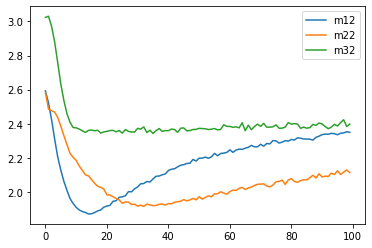

<Figure size 432x288 with 0 Axes>

In [51]:
loss_m11=load_history('model_history/history_model_1_2.npy')['val_loss']
loss_m12=load_history('model_history/history_model_2_2.npy')['val_loss']
loss_m13=load_history('model_history/history_model_3_2.npy')['val_loss']

x=range(100)
plt.plot(x,loss_m11)
plt.plot(x,loss_m12)
plt.plot(x,loss_m13)

plt.legend(['m12','m22','m32'], loc='upper right')
plt.show()
plt.savefig('loss_comparation/losses_t_bms123')

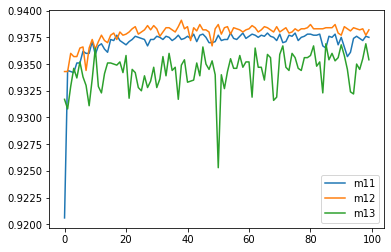

<Figure size 432x288 with 0 Axes>

In [21]:
loss_m11=load_history('model_history/history_model_1_1.npy')['val_acc']
loss_m12=load_history('model_history/history_model_1_2.npy')['val_acc']
loss_m13=load_history('model_history/history_model_1_3.npy')['val_acc']

x=range(100)
plt.plot(x,loss_m11)
plt.plot(x,loss_m12)
plt.plot(x,loss_m13)

plt.legend(['m11','m12','m13'], loc='lower right')
plt.show()
plt.savefig('accuracy_comparation/accuracy_t_m1')

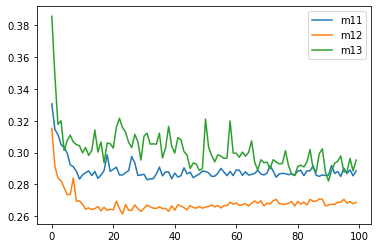

<Figure size 432x288 with 0 Axes>

In [22]:
loss_m11=load_history('model_history/history_model_1_1.npy')['val_loss']
loss_m12=load_history('model_history/history_model_1_2.npy')['val_loss']
loss_m13=load_history('model_history/history_model_1_3.npy')['val_loss']

x=range(100)
plt.plot(x,loss_m11)
plt.plot(x,loss_m12)
plt.plot(x,loss_m13)

plt.legend(['m11','m12','m13'], loc='upper right')
plt.show()
plt.savefig('loss_comparation/losses_t_m1')

In [ ]:
loss_m11=load_history('model_history/history_model_1_1.npy')['val_loss']
loss_m12=load_history('model_history/history_model_1_2.npy')['val_loss']
loss_m13=load_history('model_history/history_model_1_3.npy')['val_loss']

x=range(100)
plt.plot(x,loss_m11)
plt.plot(x,loss_m12)
plt.plot(x,loss_m13)

plt.legend(['m11','m12','m13'], loc='upper right')
plt.show()
plt.savefig('loss_comparation/losses_t_m1')

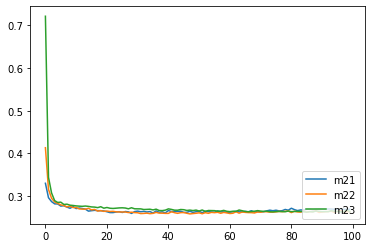

<Figure size 432x288 with 0 Axes>

In [23]:
loss_m21=load_history('model_history/history_model_2_1.npy')['val_loss']
loss_m22=load_history('model_history/history_model_2_2.npy')['val_loss']
loss_m23=load_history('model_history/history_model_2_3.npy')['val_loss']
x=range(100)
plt.plot(x,loss_m21)
plt.plot(x,loss_m22)
plt.plot(x,loss_m23)
plt.legend(['m21','m22','m23'], loc='lower right')
plt.show()
plt.savefig('loss_comparation/losses_t_m2')

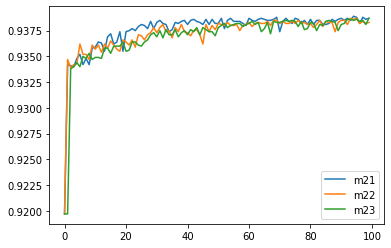

<Figure size 432x288 with 0 Axes>

In [24]:
loss_m21=load_history('model_history/history_model_2_1.npy')['val_acc']
loss_m22=load_history('model_history/history_model_2_2.npy')['val_acc']
loss_m23=load_history('model_history/history_model_2_3.npy')['val_acc']
x=range(100)
plt.plot(x,loss_m21)
plt.plot(x,loss_m22)
plt.plot(x,loss_m23)
plt.legend(['m21','m22','m23'], loc='lower right')
plt.show()
plt.savefig('accuracy_comparation/accuracy_t_m2')

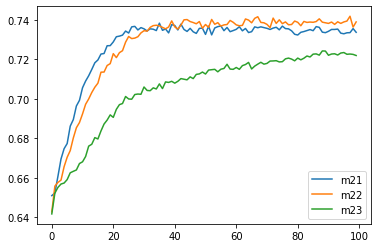

<Figure size 432x288 with 0 Axes>

In [103]:
loss_m21=load_history('model_history/history_model_2_1.npy')['val_acc']
loss_m22=load_history('model_history/history_model_2_2.npy')['val_acc']
loss_m23=load_history('model_history/history_model_2_3.npy')['val_acc']
x=range(100)
plt.plot(x,loss_m21)
plt.plot(x,loss_m22)
plt.plot(x,loss_m23)
plt.legend(['m21','m22','m23'], loc='lower right')
plt.show()
plt.savefig('accuracy_comparation/accuracy_t_m2')

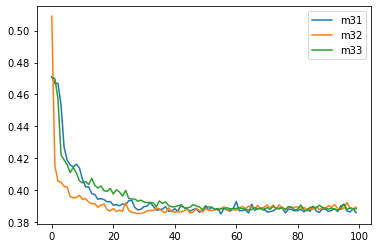

<Figure size 432x288 with 0 Axes>

In [25]:
loss_m31=load_history('model_history/history_model_3_1.npy')['val_loss']
loss_m32=load_history('model_history/history_model_3_2.npy')['val_loss']
loss_m33=load_history('model_history/history_model_3_3.npy')['val_loss']
x=range(100)
plt.plot(x,loss_m31)
plt.plot(x,loss_m32)
plt.plot(x,loss_m33)
plt.legend(['m31','m32','m33'], loc='upper right')
plt.show()
plt.savefig('loss_comparation/losses_t_m3')

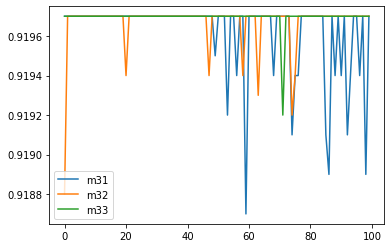

<Figure size 432x288 with 0 Axes>

In [26]:
loss_m31=load_history('model_history/history_model_3_1.npy')['val_acc']
loss_m32=load_history('model_history/history_model_3_2.npy')['val_acc']
loss_m33=load_history('model_history/history_model_3_3.npy')['val_acc']
x=range(100)
plt.plot(x,loss_m31)
plt.plot(x,loss_m32)
plt.plot(x,loss_m33)
plt.legend(['m31','m32','m33'], loc='lower left')
plt.show()
plt.savefig('accuracy_comparation/accuracy_t_m3')

4510 2272 8 5
(8000, 8) (8000, 5, 2272) (2000, 8) (2000, 5, 2272)
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 8, 256)            1154560   
_________________________________________________________________
bidirectional_7 (Bidirection (None, 512)               789504    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
repeat_vector_5 (RepeatVecto (None, 5, 512)            0         
_________________________________________________________________
bidirectional_8 (Bidirection (None, 5, 512)            1182720   
_________________________________________________________________
dropout_8 (Dropout)          (None, 5, 512)            0         
______________________________________________________

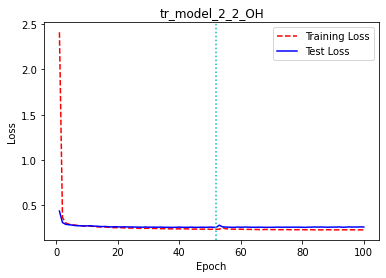

In [36]:
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', 'dataset/english-spanish-train-10000.txt','dataset/english-spanish-test-10000.txt'
units = 256
learning_rate = 0.001
loss_func='categorical_crossentropy'
epochs = 100
batch_size = 128
model_save_file_name='Models/tr_model_2_2_OH.h5'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,1)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,0)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=True)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=True)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model_history_save_file_name ='model_history/history_model_2_2_OH.npy'
model2_2_OH = define_model_2_2(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model2_2_OH,loss_func,learning_rate)
plot_model(model2_2_OH, to_file='model_images/tr_model_2_2_OH_m.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model2_2_OH, model_save_file_name,model_history_save_file_name)
graph_loss_vs_epochs(model2_2_OH.history, 'loss_vs_epochs_images/tr_model_2_2_le_OH.png', 'tr_model_2_2_OH')

In [ ]:
def define_model_1(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
	model = Sequential()
	model.add(Embedding(src_vocab, n_units, input_length=src_timesteps, mask_zero=True)) 
	model.add(Bidirectional(GRU(n_units)))
	model.add(RepeatVector(tar_timesteps))
	model.add(Bidirectional(GRU(n_units, return_sequences=True)))
	#model.add(LSTM(n_units, return_sequences=True))
	model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
	return model

In [112]:
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(8000, 5) (8000, 8, 4510) (2000, 5) (2000, 8, 4510)


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 5, 128)            290816    
_________________________________________________________________
bidirectional_22 (Bidirectio (None, 256)               198144    
_________________________________________________________________
repeat_vector_13 (RepeatVect (None, 8, 256)            0         
_________________________________________________________________
bidirectional_23 (Bidirectio (None, 8, 256)            296448    
_________________________________________________________________
time_distributed_18 (TimeDis (None, 8, 4510)           1159070   
Total params: 1,944,478
Trainable params: 1,944,478
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
250/250 - 46s - loss: 3.1029 - acc: 0.6416 - val_loss: 2.5802 - val_acc: 0.6503

Epoch 00001

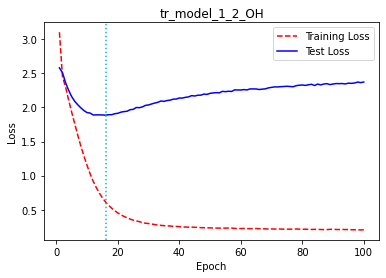

In [107]:
loss_func='categorical_crossentropy'
model_history_save_file_name ='model_history/history_model_1_2_OH.npy'
model1_2_OH = define_model_1(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model1_2_OH,loss_func,learning_rate)
plot_model(model1_2_OH, to_file='model_images/tr_model_1_2_OH_m.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model1_2_OH, model_save_file_name,model_history_save_file_name)
graph_loss_vs_epochs(model1_2_OH.history, 'loss_vs_epochs_images/tr_model_1_2_OH_le.png', 'tr_model_1_2_OH')

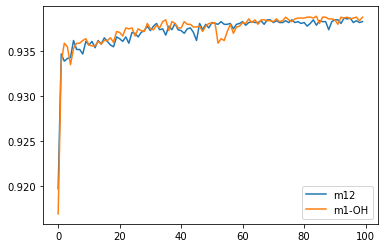

<Figure size 432x288 with 0 Axes>

In [43]:
loss_m12=load_history('model_history/history_model_2_2.npy')['val_acc']
loss_m12_OH=load_history('model_history/history_model_2_2_OH.npy')['val_acc']
x=range(100)
plt.plot(x,loss_m12)
plt.plot(x,loss_m12_OH)
plt.legend(['m12','m1-OH'], loc='lower right')
plt.show()
plt.savefig('accuracy_comparation/accuracy_t_m121_vs_OH')

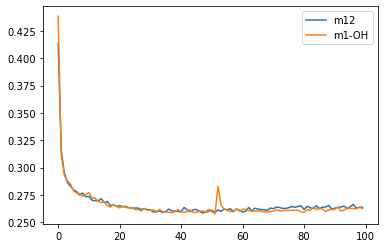

<Figure size 432x288 with 0 Axes>

In [42]:
loss_m12=load_history('model_history/history_model_2_2.npy')['val_loss']
loss_m12_OH=load_history('model_history/history_model_2_2_OH.npy')['val_loss']
x=range(100)
plt.plot(x,loss_m12)
plt.plot(x,loss_m12_OH)
plt.legend(['m12','m1-OH'], loc='upper right')
plt.show()
plt.savefig('loss_comparation/loss_t_m121_vs_OH')

In [54]:
from numpy import argmax
# asignar un número entero a una palabra
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None
 
# generar la secuencia de origen del objetivo
def predict_sequence(model, tokenizer, source):
    #print(f"S {source}")
    prediction = model.predict(source, verbose=0)[0]
    #print(f"PREDICTION {prediction}")
    integers = [argmax(vector) for vector in prediction]
    target = list()
    for i in integers:
        word = word_for_id(i, tokenizer)
        #print(f"WORD{word}")
        if word is None:
            break
        target.append(word)
    return' '.join(target)

In [5]:
best_model_t = load_model('Models/tr_model_2_2.h5')
best_model_t.compile()
best_model_t.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 8, 256)            1154560   
_________________________________________________________________
bidirectional (Bidirectional (None, 512)               789504    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
repeat_vector (RepeatVector) (None, 5, 512)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 5, 512)            1182720   
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 512)            0         
_________________________________________________________________
time_distributed (TimeDistri (None, 5, 256)            1

In [6]:
print(eng_max_sentence_length)
x_prediction_test=encode_sequences(eng_tokenizer, eng_max_sentence_length, ["Cierra las persianas"])
print(x_prediction_test)
print(x_prediction_test[0])

predict_sequence(best_model_t,spa_tokenizer,x_prediction_test)

8
[[ 182   43 2357    0    0    0    0    0]]
[ 182   43 2357    0    0    0    0    0]


''

In [20]:
print(spa_tokenizer.word_index.items())

dict_items([('i', 1), ('tom', 2), ('you', 3), ('is', 4), ('it', 5), ('a', 6), ('me', 7), ('he', 8), ('this', 9), ('are', 10), ('do', 11), ('we', 12), ('that', 13), ('go', 14), ('the', 15), ('my', 16), ('was', 17), ('they', 18), ('can', 19), ('to', 20), ('here', 21), ('come', 22), ('she', 23), ('not', 24), ('him', 25), ('on', 26), ('like', 27), ('in', 28), ('have', 29), ('be', 30), ('up', 31), ('am', 32), ('know', 33), ('love', 34), ('get', 35), ('help', 36), ('look', 37), ('your', 38), ('did', 39), ('who', 40), ('what', 41), ('need', 42), ('stop', 43), ('want', 44), ('let', 45), ('see', 46), ('now', 47), ('us', 48), ('got', 49), ('please', 50), ('no', 51), ('keep', 52), ('home', 53), ('how', 54), ('out', 55), ('saw', 56), ('mary', 57), ('there', 58), ('good', 59), ('one', 60), ('too', 61), ('her', 62), ('happy', 63), ('so', 64), ('has', 65), ('take', 66), ('just', 67), ('all', 68), ('car', 69), ('leave', 70), ('back', 71), ('hate', 72), ('stay', 73), ('at', 74), ('for', 75), ('were', 7

### HASTA AQUI!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [ ]:
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-100000.txt', 'dataset/english-spanish-train-100000.txt','dataset/english-spanish-test-100000.txt'
units = 256
learning_rate = 0.003
loss_func='sparse_categorical_crossentropy'
epochs = 100
batch_size = 128
model_save_file_name='Models/pptr_model_3_2.h5'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

10691 20707 12 17
(80000, 12) (80000, 17) (20000, 12) (20000, 17)


In [ ]:
model3_1pp = define_model_3(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model3_1pp,loss_func,learning_rate)
plot_model(model3_1pp, to_file='model_images/tr_model_3_1_mpp.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model3_1pp, model_save_file_name)
graph_loss_vs_epochs(model3_1pp.history, 'loss_vs_epochs_images/tr_model_3_1_lepp.png', 'tr_model_3_1pp')

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 128)         1368448   
_________________________________________________________________
bidirectional_16 (Bidirectio (None, 512)               592896    
_________________________________________________________________
repeat_vector_8 (RepeatVecto (None, 17, 512)           0         
_________________________________________________________________
bidirectional_17 (Bidirectio (None, 17, 512)           1182720   
_________________________________________________________________
time_distributed_10 (TimeDis (None, 17, 20707)         10622691  
Total params: 13,766,755
Trainable params: 13,766,755
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100


ResourceExhaustedError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/clip_by_value/Minimum' defined at (most recent call last):
    File "C:\Users\inav2\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\inav2\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\inav2\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\inav2\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\inav2\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\inav2\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\inav2\anaconda3\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "C:\Users\inav2\anaconda3\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "C:\Users\inav2\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\inav2\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "C:\Users\inav2\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "C:\Users\inav2\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
      await result
    File "C:\Users\inav2\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "C:\Users\inav2\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\inav2\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Users\inav2\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
      result = self._run_cell(
    File "C:\Users\inav2\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
      return runner(coro)
    File "C:\Users\inav2\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\inav2\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\inav2\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\inav2\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\inav2\AppData\Local\Temp/ipykernel_22156/837336323.py", line 4, in <module>
      train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model3_1pp, model_save_file_name)
    File "c:\TIARA\UNIVERSIDAD\SEMESTRE 7\SISTEMAS INTELIGENTES\PROYECTO MACHINE TRANSLATION FINAL\MachineTranslation\PROYECTO MACHINE TRANSLATION\fit_model.py", line 82, in train_evaluate_model
      model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size,  validation_data=(testX, testY),callbacks=[checkpoint], verbose=2)
    File "C:\Users\inav2\anaconda3\lib\site-packages\keras\engine\training.py", line 1184, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\inav2\anaconda3\lib\site-packages\keras\engine\training.py", line 853, in train_function
      return step_function(self, iterator)
    File "C:\Users\inav2\anaconda3\lib\site-packages\keras\engine\training.py", line 842, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\inav2\anaconda3\lib\site-packages\keras\engine\training.py", line 835, in run_step
      outputs = model.train_step(data)
    File "C:\Users\inav2\anaconda3\lib\site-packages\keras\engine\training.py", line 788, in train_step
      loss = self.compiled_loss(
    File "C:\Users\inav2\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\inav2\anaconda3\lib\site-packages\keras\losses.py", line 141, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\inav2\anaconda3\lib\site-packages\keras\losses.py", line 245, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\inav2\anaconda3\lib\site-packages\keras\losses.py", line 1738, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "C:\Users\inav2\anaconda3\lib\site-packages\keras\backend.py", line 4923, in sparse_categorical_crossentropy
      output = tf.clip_by_value(output, epsilon_, 1 - epsilon_)
Node: 'sparse_categorical_crossentropy/clip_by_value/Minimum'
OOM when allocating tensor with shape[128,17,20707] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[{{node sparse_categorical_crossentropy/clip_by_value/Minimum}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_366683]

In [ ]:
def define_model_p(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
	model = Sequential()
	model.add(Embedding(src_vocab, n_units, input_length=src_timesteps, mask_zero=True)) 
	model.add(MultiHeadAttention(
            num_heads=8, key_dim=n_units
        ))
	model.add(Bidirectional(GRU(n_units)))
	model.add(RepeatVector(tar_timesteps))
	model.add(MultiHeadAttention(
            num_heads=8, key_dim=n_units
        ))
	model.add(Bidirectional(GRU(n_units, return_sequences=True)))
	#model.add(LSTM(n_units, return_sequences=True))
	model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
	return model

In [ ]:
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', 'dataset/english-spanish-train-10000.txt','dataset/english-spanish-test-10000.txt'
units = 256
learning_rate = 0.003
loss_func='sparse_categorical_crossentropy'
epochs = 2
batch_size = 128
model_save_file_name='Models/pptr_model_3_1pp.h5'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
